In [53]:
% matplotlib inline
import numpy as np
# import matplotlib as mpl
# mpl.use('TkAgg')

import matplotlib.pyplot as plt

xpixels = 900
ypixels = 400

# get the size in inches
dpi = 72.
xinch = xpixels / dpi
yinch = ypixels / dpi

fig_size = [xinch, yinch]
plt.rcParams["figure.figsize"] = fig_size

In the first problem set we analyzed two coupled phase oscillators, and determined under what conditions the two were phase-locked, or “synchronized.” As we discussed in class, the situation becomes more complicated when there is a collection of many coupled oscillators in the presence of noise. A model governing equation for globally coupled oscillators can be written as:

$\dot{\theta_i} = \omega_i + \alpha\sin(\theta_{avg} - \theta_i) + \zeta_i$

a) Setting all $\omega_i$ equal, simulate N=100 phase oscillators, specified as a vector theta, initialized to a uniform random distribution. 

Circular variance : $$Z = \frac{1}{N}\sum_{j} e^{i\theta_j} = |Z| e^{i\theta_{avg}}$$

Be sure to calculate the average $\theta_{avg}$ using the circular average. 
Plot the circular variance (synchrony) over time. Also plot the sine of the phases of all oscillators together on one plot. 

Describe what you see. Use $\alpha = .1$, and $\zeta$ a Gaussian distribution with mean $\mu = .1$ and standard deviation $\sigma = .1$ added to $\theta$ every time step (use dt = .1). 
(It is strongly recommended to write your solver for this problem – eg. using Euler’s method – rather than using ode45)

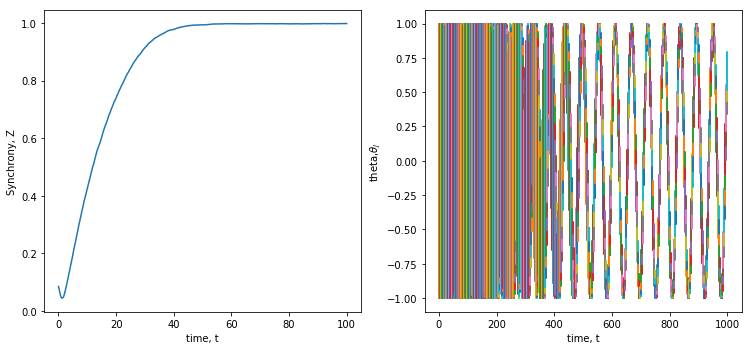

In [2]:
from scipy.integrate import odeint

def plot_synchrony_theta(alpha, N, mu, sigma):
    omega = 1
    ta = 0
    tb = 100
    T = 1000
    dtheta=0.01

    def get_theta():
        # set time index up to 100
        # step size
        h=0.1

        t=np.linspace(ta,tb,T)

        # initialize matrix for theta variable values
        # assign random values to ossiclator thetas
        theta_i = np.zeros((N,T),dtype=np.float64)
        theta_i[:,0] = np.random.uniform(low=0, high=2*np.pi, size=N)

        # define function for ODE
        def F_ttheta(theta):
            theta_avg = np.average(theta)
            noise = np.random.normal(loc=mu, scale=sigma, size=N)
            return (omega + alpha* np.sin(theta_avg - theta)) + noise

        for i in xrange(1,T):
            theta_i[:,i] = theta_i[:,i-1] + h*F_ttheta(theta_i[:,i-1])

        return theta_i

    def get_synchrony(theta_N_t):
        #calculate z(i) for theta(i)
        real = np.cos(theta_N_t)
        imag = np.sin(theta_N_t)

        #calculate Z (Synchrony)
        magZ = np.absolute(np.sum(real) + 1j*np.sum(imag))/N
        return magZ

    Z = np.linspace(ta, tb, T)
    theta_N = get_theta() 

    plt.subplot(1, 2, 2)
    for j in xrange(0,T):
        theta_N_t = theta_N[:,j]
        t = np.ones(N)
        plt.plot(t*j,np.sin(theta_N_t))

        Z[j] = get_synchrony(theta_N_t)

    plt.xlabel(r'time, t')
    plt.ylabel(r'theta,$\theta_j$')

    plt.subplot(1, 2, 1)
    t=np.linspace(ta,tb,T)  
    plt.plot(t,Z)
    plt.xlabel(r'time, t')
    plt.ylabel(r'Synchrony, Z')
    plt.show()
    
alpha = 0.1
N=100
mu =0.1
sigma=0.1
plot_synchrony_theta(alpha,N, mu, sigma)

b) Switch the sign of $\alpha$ to be negative, repeat the simulation, and generate the same types of graphs. What happens? Why? What happens if N = 2? Why? 5 pts.

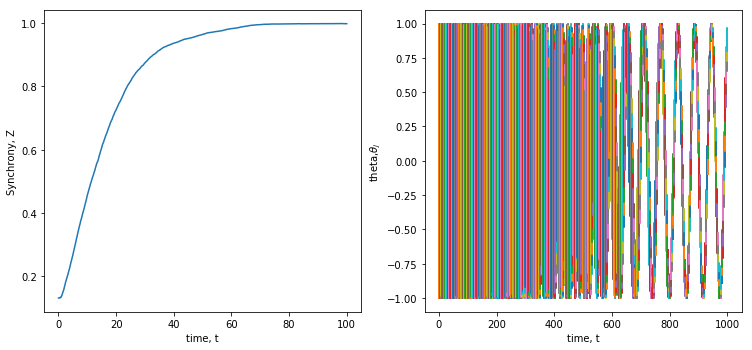

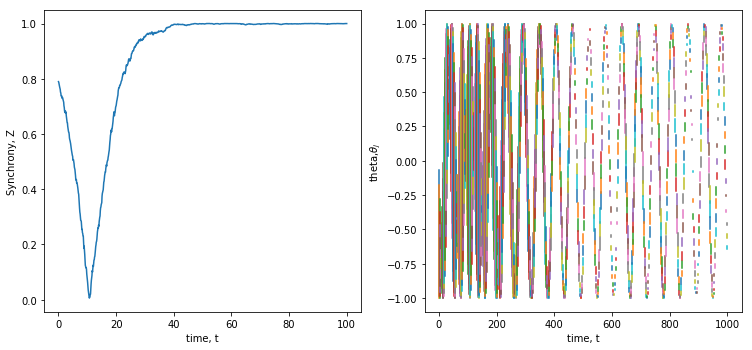

In [3]:
alpha = -alpha
plot_synchrony_theta(alpha,N, mu,sigma)

N=2
plot_synchrony_theta(alpha,N, mu, sigma)

c) For positive $\alpha$, vary the mean and variance of $\zeta$. Describe some of the behaviors you see, include some plots, and give an intuitive explanation of how the noise relates to synchrony.

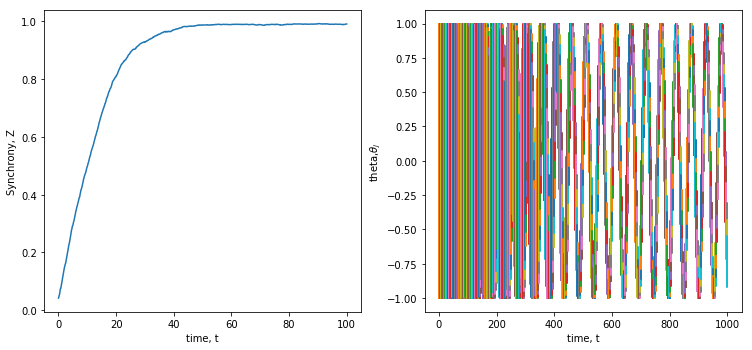

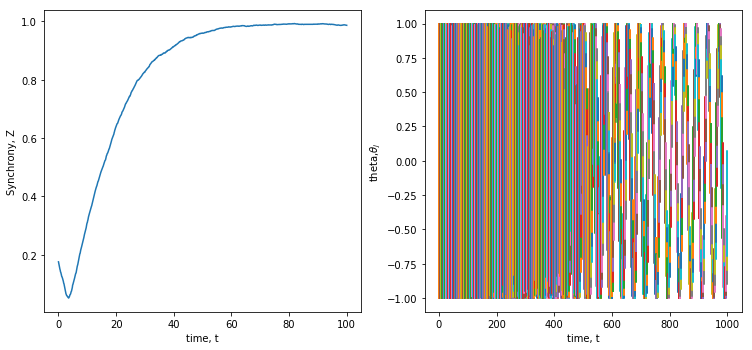

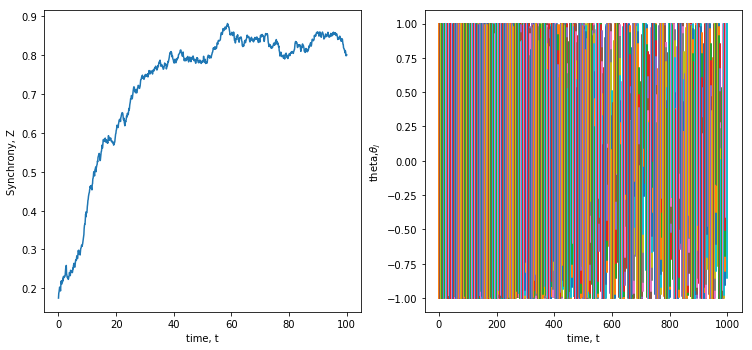

In [4]:
alpha = -alpha
N=100
mu =0.2
sigma=0.2
plot_synchrony_theta(alpha,N, mu, sigma)

mu =0.6
sigma=0.2
plot_synchrony_theta(alpha,N, mu, sigma)

mu =1.0
sigma=0.8
plot_synchrony_theta(alpha,N, mu, sigma)

d) We are now prepared to model the spatio-temporal production of zebrafish somites via travelling waves. To do so, consider the 100 oscillators not as randomly positioned in space, but rather along the anterior-posterior axis of a growing tail. Modify your simulation from earlier as follows:

1) Instead of being globally coupled, each oscillator is now coupled to its two neighbors: 

$\dot{\theta_i} = \omega_i + \alpha\sin(\theta_{i+1}−\theta_i)+\alpha\sin(\theta_{i−1}−\theta_i)$

2) Instead of all $\omega_i$ being equal, they now have a global frequency profile (biologically determined by a gradient): 

$\omega_i = 1 − e^{−i/\lambda}$, and set $\lambda = 20$.

3) Add a new oscillator with phase equal to the last to the end of the vector about 10 times per oscillation (does not have to be exact). When you do this, shift the ω gradient over by one to include the new oscillator, and stop simulating the anterior- most oscillators. Alternatively, this can be thought of as having a 100-oscillator ’active’ simulation region with new oscillators being added at the posterior end which causes old oscillators to be pushed out of the ’active’ region at the anterior end (i.e. frozen). The new oscillator phase can be set to the same phase as the previously posterior-most oscillator. Choose reasonable parameters as needed.

Plot the sine of the oscillators over space (not over time as was done earlier) for several time values to show the travelling waves and “freezing” of the anterior “segments.” It may help to animate your simulation by re-plotting sinθ every time step. The commands drawnow and pause may come in handy if you choose to do this. Include in your submission a few (eg. 5 – 10) such plots at various time points during the progress of your simulation.

In [114]:
from matplotlib import animation
from IPython.display import HTML, Image

# get theta at ith step in time
def get_theta(theta_i, start, end):
    # define function for ODE
    def F_ttheta(theta):
        N = len(theta)
        theta_avg = np.average(theta)
        noise = np.random.normal(loc=mu, scale=sigma, size=N)

        # calculate based on neighbours
        for j in xrange(0,N-1):
            if j==0:
                theta_left = theta[N-1]
            else:
                theta_left = theta[j-1]
            if j==N-1:
                theta_right = theta[0]
            else:
                theta_right = theta[j-1]

            theta[j] = omega[j] + alpha* np.sin(theta_right - theta[j]) + alpha* np.sin(theta_left - theta[j])
        return theta

    # step size
    h=0.1
    return theta_i + h*F_ttheta(theta_i)
        
alpha = 0.1
N=100
mu =0.1
sigma=0.1  
ta = 0
tb = 100
T = 1000
dx=0.1
l = 20

fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((-100, 100))

plt.ylabel(r'$\sin(\theta)$')
plt.xlabel(r'$x$')

line, = ax.plot([], [])

theta_all = np.zeros((T,T),dtype=np.float64)
theta_all[0:N,0] = np.random.uniform(low=0, high=2*np.pi, size=N)

# use same omega for all oscillators by shifting by 1 each time
omega = np.linspace(0,N,N)

for n in xrange(N):
    omega[n] = 1-np.exp(-n/l)

x = np.linspace(ta, tb, T)
ones = np.ones([T,T])
X=x*ones

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
#     print "iteration: ", i
#     print "%d-%d:%d => %d-%d:%d"%(i,N+i-1,i, i+1,N+i,i+1)
#     print theta_all[i+1:N+i, i+1].shape
#     print theta_all[i:N+i-1, i].shape
    
    # add an oscillator at ith step
    dummy = theta_all[i:N+i, i]
#     print dummy.shape
    
#     print "%d => %d"%(N-2,N-1) # always update 99 with 98
    dummy[N-1] = dummy[N-2]
    
    # we will move in blocks of N each step to right by dx
    # due to removal of one vector from left and addition of one on right
    theta_all[i+1:N+i+1,i+1] = get_theta(dummy, 0, 0) 
    
#     print "X=", np.shape(X)
#     print "Y=", np.shape(theta_all)
    
    line.set_data(X,np.sin(theta_all))
    return (line,)


anim = animation.FuncAnimation(fig, animate,init_func=init,
                               frames=30, interval=10, blit=True)
anim.save('animation.gif', writer='imagemagick', fps=30)
plt.close()

Image(url='animation.gif')